# Deep Q-Learning to collect yellow bananas using Dueling Networks

---

In this notebook, I will demonstrate, how to train an agent using Deep Q-Learning and Dueling networks.
### 1. Prepare 


In [9]:
import os
import matplotlib.pyplot as plt

#make sure, Environment is not going through proxy, when running on local machine
os.environ['NO_PROXY'] = 'localhost,127.0.0.*'

# define function for plotting scores
def plot(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()


## 2. Start environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
from unityagents import UnityEnvironment
env = UnityEnvironment(file_name="Banana/Banana.exe", base_port=64738)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# Run training

In [5]:
import numpy as np
from collections import deque
from dqn_agent import Agent
import torch

def dqn(env, n_episodes=10000, max_t=1000, eps_start=1.0, eps_end=0.005, eps_decay=0.995, train_mode=True):
    """Deep Q-Learning.
    
    Params
    ======
        agent: 
        env: 
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train_mode (bool): set environment into training mode if True. 
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    action_size = brain.vector_action_space_size
    env_info = env.reset(train_mode=train_mode)[brain_name]
    state_size = len(env_info.vector_observations[0])

    agent = Agent(state_size=state_size, action_size=action_size, seed=1)

    for i_episode in range(1, n_episodes+1):
        state = env_info.vector_observations[0]
        score = 0
        for _ in range(max_t):
            action = np.int32(agent.act(state, eps))
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished

            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                env.reset(train_mode=train_mode)[brain_name]
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_vanilla.pth')
            break
    return scores


In [7]:
from datetime import datetime
start=datetime.now()
scores = dqn(env=env)
end=datetime.now()
print("Duration: {}".format(end-start))



Episode 100	Average Score: 0.53
Episode 200	Average Score: 3.87
Episode 300	Average Score: 7.14
Episode 400	Average Score: 9.07
Episode 500	Average Score: 12.41
Episode 522	Average Score: 13.04
Environment solved in 422 episodes!	Average Score: 13.04
Duration: 0:18:05.160956


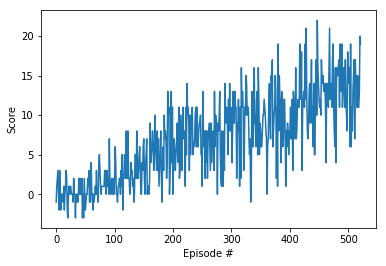

In [10]:
plot(scores)